# Create ExampleData from NascentRNA data
This data is used by the example notebooks in CAMPA to showcase analysis functions from CAMPA. 

It consists of 2 wells from 2 different conditions (unperturbed and meyayamycin), containing 20 cells each

It is registered by default as `ExampleData` in `campa.ini`

In [7]:
from campa.data import MPPData
from campa.utils import init_logging
init_logging()

In [12]:
for data_dir in ['184A1_unperturbed/I09', '184A1_unperturbed/I11', '184A1_meayamycin/I12', '184A1_meayamycin/I20']:
    mpp_data = MPPData.from_data_dir(data_dir, data_config='NascentRNA')
    mpp_data.subset(num=20)
    mpp_data.write(f'/Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/{data_dir}')

INFO:MPPData:Created new: MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.
INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to 20 random objects
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/184A1_unperturbed/I09 (keys: ['y', 'labels', 'obj_ids', 'mpp', 'x'])
INFO:MPPData:Created new: MPPData for NascentRNA (14097457 mpps with shape (1, 1, 35) from 1025 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I11.
INFO:MPPData:Before subsetting: 1025 objects
INFO:MPPData:Subsetting to 20 random objects
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/184A1_unperturbed/I11 (keys: ['y', 'labels', 'obj_ids', 'mpp', 'x'])
INFO:MPPData:Created new: MPPData fo

In [13]:
from campa.constants import campa_config
import shutil
import os

shutil.copy(os.path.join(campa_config.BASE_DATA_DIR, 'NascentRNA_new', 'channels_metadata.csv'), 
os.path.join('/Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/', 'channels_metadata.csv'))


'/Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/channels_metadata.csv'

# Create TestData for tests

Data (`TestData`)
- Data is 2 cells from one well for each of unperturbed and meayamycin.
- Channels are reduced to 5:  '01_PABPC1', '03_CDK9', '09_SRRM2', '10_POL2RA_pS2', '11_PML'
- Data will be saved in `tests/_data` 

Dataset (`reference_dataset`)
- Dataset is 100 pixels from each cell from TestData

Experiment (`reference_experiment`)
- Train for 2 epochs on `reference_dataset` and cluster + extract features from `TestData`


In [12]:
from campa.constants import SCRIPTS_DIR, campa_config
# set up config
campa_config.EXPERIMENT_DIR = os.path.join(SCRIPTS_DIR, "tests", "_experiments")
campa_config.add_data_config("TestData", os.path.join(SCRIPTS_DIR, "tests/_data/TestData_constants.py"))

print("CAMPA CONFIG:")
print(campa_config)

from campa.data import MPPData
import os
import shutil
from campa.tl import LossEnum, ModelEnum
from campa.tl import Experiment, run_experiments
from campa.data import create_dataset
from campa.tl import project_cluster_data, create_cluster_data, prepare_full_dataset, extract_features
from campa.utils import init_logging
init_logging()

Reading config from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini
Overwriting existing data config for testdata
CAMPA CONFIG:
CAMPAConfig (fname: /Users/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini)
EXPERIMENT_DIR: /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments
BASE_DATA_DIR: /Users/hannah.spitzer/projects/pelkmans/local_data
CO_OCC_CHUNK_SIZE: 10000000.0
data_config/nascentrna: /Users/hannah.spitzer/projects/pelkmans/software_new/campa_ana/NascentRNA_constants.py
data_config/testdata: /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/TestData_constants.py
data_config/exampledata: /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/params/ExampleData_constants.py



/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'plotting' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [6]:
# create TestData
for data_dir in ['184A1_unperturbed/I09', '184A1_meayamycin/I12']:
    mpp_data = MPPData.from_data_dir(data_dir, data_config='NascentRNA')
    mpp_data.subset(num=3, cell_cycle='NO_NAN')
    mpp_data.subset_channels(channels=['01_PABPC1', '03_CDK9', '09_SRRM2', '10_POL2RA_pS2', '11_PML'])
    mpp_data.write(f'/Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/{data_dir}')

shutil.copy(os.path.join(campa_config.BASE_DATA_DIR, 'NascentRNA_new', 'channels_metadata.csv'), 
os.path.join('/Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data', 'channels_metadata.csv'))

INFO:MPPData:Created new: MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.
INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 557 objects
INFO:MPPData:Subsetting to 3 random objects
INFO:MPPData:Subsetting from 35 channels
INFO:MPPData:Restricted channels to 5 channels
INFO:MPPData:The following channels were excluded ['00_DAPI' '00_EU' '01_CDK9_pT186' '02_CDK7' '03_RPS6' '05_GTF2B' '05_Sm'
 '07_H2B' '07_POLR2A' '07_SETD1A' '08_H3K4me3' '09_CCNT1' '10_H3K27ac'
 '11_KPNA2_MAX' '12_RB1_pS807_S811' '12_YAP1' '13_PABPN1' '13_POL2RA_pS5'
 '14_PCNA' '15_SON' '15_U2SNRNPB' '16_H3' '17_HDAC3' '17_SRSF2' '18_NONO'
 '19_KPNA1_MAX' '20_ALYREF' '20_SP100' '21_COIL' '21_NCL']
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/184A1_unperturbed/I09 (keys: ['obj_ids', 'mpp', 'y',

'/Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/channels_metadata.csv'

In [13]:
# set base data dir to correct data path for TestData
campa_config.BASE_DATA_DIR = os.path.join(SCRIPTS_DIR, "tests/_data")
# create reference_dataset
data_params = {
    'dataset_name': 'reference_dataset',
    'data_config': "TestData",
    'data_dirs': 
            [os.path.join('184A1_unperturbed', well) for well in ['I09',]] + \
            [os.path.join('184A1_meayamycin', well) for well in ['I12',]],
    'channels': ['01_PABPC1', '03_CDK9', '09_SRRM2', '10_POL2RA_pS2', '11_PML',], 
    'condition': ['perturbation_duration_one_hot', 'cell_cycle_one_hot'],
    'condition_kwargs': {
        'cond_params': {}
    },
    'split_kwargs': {
        'train_frac': 0.35,
        'val_frac': 0.35,
    },
    'test_img_size': 225,
    'subset': True,
    'subset_kwargs': {
        'frac': None,
        'nona_condition': True,
        'cell_cycle': 'NO_NAN'
    },
    'subsample': True,
    'subsample_kwargs': {
        'frac': None,
        'frac_per_obj': None,
        'num': None,
        'num_per_obj': 100,
    },
    'neighborhood': True,
    'neighborhood_size': 3,
    'normalise': True,
    'normalise_kwargs': {
        'background_value': 'mean_background',
        'percentile': 98.0,
        'rescale_values': [],
    },
    'seed': 42,
}

create_dataset(data_params)

INFO:root:Creating train/val/test datasets with params:
INFO:root:{
    "dataset_name": "reference_dataset",
    "data_config": "TestData",
    "data_dirs": [
        "184A1_unperturbed/I09",
        "184A1_meayamycin/I12"
    ],
    "channels": [
        "01_PABPC1",
        "03_CDK9",
        "09_SRRM2",
        "10_POL2RA_pS2",
        "11_PML"
    ],
    "condition": [
        "perturbation_duration_one_hot",
        "cell_cycle_one_hot"
    ],
    "condition_kwargs": {
        "cond_params": {}
    },
    "split_kwargs": {
        "train_frac": 0.35,
        "val_frac": 0.35
    },
    "test_img_size": 225,
    "subset": true,
    "subset_kwargs": {
        "frac": null,
        "nona_condition": true,
        "cell_cycle": "NO_NAN"
    },
    "subsample": true,
    "subsample_kwargs": {
        "frac": null,
        "frac_per_obj": null,
        "num": null,
        "num_per_obj": 100
    },
    "neighborhood": true,
    "neighborhood_size": 3,
    "normalise": true,
    "normali

In [14]:
# train reference model
from campa.tl import LossEnum, ModelEnum

experiment_config = {
    "experiment": {
        "dir": "reference_experiment",
        "name": "cVAE",
        "save_config": True,
    },
    "data": {
        "data_config": "TestData",
        "dataset_name": "reference_dataset",
        "output_channels": None,
    },
    "model": {
        "model_cls":  ModelEnum.VAEModel,
        "model_kwargs": {
            "num_neighbors": 3,
            "num_channels": 5,
            "num_output_channels": 5,
            "latent_dim": 4,
            # encoder definition
            "encoder_conv_layers": [16],
            "encoder_conv_kernel_size": [1],
            "encoder_fc_layers": [8],
            # decoder definition
            "decoder_fc_layers": [],
            "num_conditions": 6,
            "encode_condition": [6],
        },
        # if true, looks for saved weights in experiment_dir
        # if a path, loads these weights
        "init_with_weights": False,
    },
    "training": {
        "learning_rate": 0.001,
        "epochs": 5,
        "batch_size": 128,
        "loss": {"decoder": LossEnum.SIGMA_MSE, "latent": LossEnum.KL},
        "metrics": {"decoder": LossEnum.MSE_metric, "latent": LossEnum.KL},
        # saving models
        "save_model_weights": True,
        "save_history": True,
        "overwrite_history": True,
    },
    "evaluation": {
        "split": "val",
        "predict_reps": ["latent", "decoder"],
        "img_ids": 1,
        "predict_imgs": True,
        "predict_cluster_imgs": True,
    },
    "cluster": {  # cluster config, also used in this format for whole data clustering
        "cluster_name": "clustering",
        "cluster_rep": "latent",
        "cluster_method": "leiden",  # leiden or kmeans
        "leiden_resolution": 0.2,
        "subsample": True,  # 'subsample' or 'som'
        "subsample_kwargs": {'frac': 0.1},
        "som_kwargs": {},
        "umap": True,
    },
}

exp = Experiment(experiment_config)

# 10s on MBP
run_experiments([exp], mode='trainval')

INFO:Experiment:Setting up experiment reference_experiment/cVAE
INFO:Experiment:Saving config to reference_experiment/cVAE/config.json
2022-05-03 09:39:18.683363: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:VAEModel:Creating model


Running experiment for ['cVAE'] with mode trainval
Training model for cVAE


INFO:MPPData:Created new: MPPData for TestData (200 mpps with shape (3, 3, 5) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/datasets/reference_dataset/train.
INFO:MPPData:Created new: MPPData for TestData (200 mpps with shape (3, 3, 5) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/datasets/reference_dataset/val.
INFO:MPPData:Created new: MPPData for TestData (200 mpps with shape (3, 3, 5) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/datasets/reference_dataset/test.
INFO:MPPData:Created new: MPPData for TestData (20522 mpps with shape (1, 1, 5) from 2 objects). Data keys: ['x', 'y',

Epoch 1/5
2/2 [==============================] - 5s 2s/step - loss: 721.5070 - decoder_loss: 721.4775 - latent_loss: 0.0296 - decoder_mean_squared_error: 0.8409 - latent_kl_loss: 0.0299 - val_loss: 711.9777 - val_decoder_loss: 711.9329 - val_latent_loss: 0.0447 - val_decoder_mean_squared_error: 0.8075 - val_latent_kl_loss: 0.0402
Epoch 2/5
2/2 [==============================] - 0s 140ms/step - loss: 723.0965 - decoder_loss: 723.0673 - latent_loss: 0.0291 - decoder_mean_squared_error: 0.8369 - latent_kl_loss: 0.0291 - val_loss: 707.3828 - val_decoder_loss: 707.3387 - val_latent_loss: 0.0441 - val_decoder_mean_squared_error: 0.7870 - val_latent_kl_loss: 0.0397
Epoch 3/5
2/2 [==============================] - 0s 119ms/step - loss: 704.0982 - decoder_loss: 704.0684 - latent_loss: 0.0298 - decoder_mean_squared_error: 0.8048 - latent_kl_loss: 0.0297 - val_loss: 688.2597 - val_decoder_loss: 688.2142 - val_latent_loss: 0.0455 - val_decoder_mean_squared_error: 0.7479 - val_latent_kl_loss: 0.040

INFO:Estimator:Saving model to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/weights_epoch005
INFO:Predictor:Creating Predictor for reference_experiment/cVAE
INFO:VAEModel:Creating model


Evaluating model for cVAE


INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/weights_epoch005
INFO:MPPData:Created new: MPPData for TestData (200 mpps with shape (3, 3, 5) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/datasets/reference_dataset/train.
INFO:MPPData:Created new: MPPData for TestData (200 mpps with shape (3, 3, 5) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/datasets/reference_dataset/val.
INFO:MPPData:Created new: MPPData for TestData (200 mpps with shape (3, 3, 5) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_

Clustering results for cVAE
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/results_epoch005/val/clustering.npy


INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for latent
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/results_epoch005/val (keys: ['clustering', 'y', 'umap', 'x', 'obj_ids'])
INFO:Predictor:Creating Predictor for reference_experiment/cVAE
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/weights_epoch005
INFO:MPPData:Created new: MPPData for TestData (200 mpps with shape (3, 3, 5) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_data/datasets/reference_dataset/train.
INFO:MPPData:Created new: MPPData for TestData (200 mpps with shape (3, 3, 5) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'con

In [15]:
# clustering of reference model 
# cluster data on subset
# 14s on MBP
create_cluster_data("reference_experiment/cVAE", subsample=True, frac=0.1, save_dir="aggregated/sub-0.1", cluster=True)

# prepare full dataset for projecting cluster to it
# 5s on MBP
prepare_full_dataset("reference_experiment/cVAE", save_dir="aggregated/full_data")

# predict model on full data
# 7s on MBP
project_cluster_data(
    "reference_experiment/cVAE",
    cluster_data_dir="aggregated/sub-0.1",
    cluster_name="clustering",
    save_dir="aggregated/full_data",
)

INFO:Experiment:Setting up experiment reference_experiment/cVAE
INFO:Experiment:Initialised from existing experiment in reference_experiment/cVAE
INFO:MPPData:Created new: MPPData for TestData (9189 mpps with shape (3, 3, 5) from 6 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].
INFO:MPPData:Loaded data from reference_experiment/cVAE/aggregated/sub-0.1.
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (9189 mpps with shape (3, 3, 5) from 6 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].
INFO:Cluster:creating cluster mpp from config
INFO:Cluster:processing cluster_mpp like dataset reference_dataset
INFO:MPPData:Created new: MPPData for TestData (47747 mpps with shape (1, 1, 5) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.
INFO:MPPData:Before subsetting: 3 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 3 objects
INFO:MPPData:Created n

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/aggregated/sub-0.1/clustering.npy


INFO:MPPData:Subsetting from 5 channels
INFO:MPPData:Restricted channels to 5 channels
INFO:MPPData:None of the channels were excluded 
INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per channels with predefined values
INFO:MPPData:Adding conditions: ['perturbation_duration_one_hot', 'cell_cycle_one_hot']
INFO:MPPData:Looking up condition perturbation_duration, with postprocess one_hot
INFO:convert_condition:Converting condition perturbation_duration to numbers
INFO:MPPData:Looking up condition cell_cycle, with postprocess one_hot
INFO:convert_condition:Converting condition cell_cycle to numbers
INFO:MPPData:Before subsetting: 6 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 6 objects
INFO:MPPData:Subsetting to objects with NO_NAN condition: 6
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/aggregated/sub-0.1

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/aggregated/sub-0.1/clustering.npy


INFO:Cluster:Projecting clustering to 47747 samples
INFO:Cluster:processing chunk 0
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/aggregated/full_data/184A1_unperturbed/I09 (keys: ['clustering', 'x', 'y', 'obj_ids'])
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (44150 mpps with shape (1, 1, 5) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from 184A1_meayamycin/I12.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (44150 mpps with shape (1, 1, 5) from 3 objects). Data keys: ['latent', 'x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 3 objects
INFO:MPPData:Subsetting to 3 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent']
INFO:MPPData:Loaded data from 184A1_meayamycin/I12, with base data from 184A1_meayamycin/I12
INFO:Cluster:Projecting cluste

In [17]:
# extract features
feature_params = {
    "experiment_dir": "reference_experiment/cVAE",
    "cluster_name": "clustering",
    "cluster_dir": "aggregated/sub-0.1",
    "cluster_col": None,
    "data_dirs": ["184A1_unperturbed/I09", "184A1_meayamycin/I12"],
    "save_name": "features.h5ad",
    "force": False,
    "features":  ["intensity", "co-occurrence", "object-stats"],
    "co_occurrence_params": {
        "min": 2.0,
        "max": 10.0,
        "nsteps": 2,
        "logspace": False,
        "num_processes": 1,
    },
    "object_stats_params": {
        "features": ["area", "circularity", "elongation", "extent"],
        "channels": ["11_PML"],
    },
}
# 60s on MBP
extract_features(feature_params)


INFO:Experiment:Setting up experiment reference_experiment/cVAE
INFO:Experiment:Initialised from existing experiment in reference_experiment/cVAE
INFO:extract_features:extracting features ['intensity', 'co-occurrence', 'object-stats'] from 184A1_unperturbed/I09
INFO:FeatureExtractor:Calculating clustering (col: clustering) mean and size for 184A1_unperturbed/I09
INFO:MPPData:Created new: MPPData for TestData (47747 mpps with shape (1, 1, 5) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (47747 mpps with shape (1, 1, 5) from 3 objects). Data keys: ['clustering', 'x', 'y', 'obj_ids', 'latent', 'mpp'].
INFO:MPPData:Before subsetting: 3 objects
INFO:MPPData:Subsetting to 3 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering', 'latent']
INFO:MPPData:Loaded data from 184A1_unperturbed/I09, wit

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/aggregated/full_data/184A1_unperturbed/I09/clustering.npy


INFO:MPPData:Rescaling MPP intensities per channels with predefined values
INFO:MPPData:Adding conditions: ['perturbation_duration_one_hot', 'cell_cycle_one_hot']
INFO:MPPData:Looking up condition perturbation_duration, with postprocess one_hot
INFO:convert_condition:Converting condition perturbation_duration to numbers
INFO:MPPData:Looking up condition cell_cycle, with postprocess one_hot
INFO:convert_condition:Converting condition cell_cycle to numbers
INFO:MPPData:Before subsetting: 3 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 3 objects
INFO:MPPData:Subsetting to objects with NO_NAN condition: 3
INFO:FeatureExtractor:saving adata to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/aggregated/full_data/184A1_unperturbed/I09/features.h5ad
INFO:FeatureExtractor:calculating co-occurrence for intervals [ 2. 10.] and clustering clustering (col: clustering)
INFO:FeatureExtractor:calculating co-occurrence for 3 objects
INFO:M

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/aggregated/full_data/184A1_meayamycin/I12/clustering.npy


INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per channels with predefined values
INFO:MPPData:Adding conditions: ['perturbation_duration_one_hot', 'cell_cycle_one_hot']
INFO:MPPData:Looking up condition perturbation_duration, with postprocess one_hot
INFO:convert_condition:Converting condition perturbation_duration to numbers
INFO:MPPData:Looking up condition cell_cycle, with postprocess one_hot
INFO:convert_condition:Converting condition cell_cycle to numbers
INFO:MPPData:Before subsetting: 3 objects
INFO:MPPData:Subsetting to NO_NAN cell_cycle: 3 objects
INFO:MPPData:Subsetting to objects with NO_NAN condition: 3
INFO:FeatureExtractor:saving adata to /Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment/cVAE/aggregated/full_data/184A1_meayamycin/I12/features.h5ad
INFO:FeatureExtractor:calculating co-occurrence for intervals [ 2. 10.] and clustering clust

## Test plotting

In [18]:
# test plotting
import anndata as ad
from campa.tl import FeatureExtractor

In [19]:
# load data
exp = Experiment.from_dir("reference_experiment/cVAE")
extrs = [
    FeatureExtractor.from_adata(
        os.path.join(exp.full_path, "aggregated/full_data", data_dir, "features.h5ad")
    )
    for data_dir in exp.data_params["data_dirs"]
]

extrs[0].adata

INFO:Experiment:Setting up experiment reference_experiment/cVAE
INFO:Experiment:Initialised from existing experiment in reference_experiment/cVAE
INFO:Experiment:Setting up experiment reference_experiment/cVAE
INFO:Experiment:Initialised from existing experiment in reference_experiment/cVAE
INFO:Experiment:Setting up experiment reference_experiment/cVAE
INFO:Experiment:Initialised from existing experiment in reference_experiment/cVAE


AnnData object with n_obs × n_vars = 3 × 5
    obs: 'mapobject_id', 'plate_name', 'well_name', 'well_pos_y', 'well_pos_x', 'tpoint', 'zplane', 'label', 'is_border', 'mapobject_id_cell', 'plate_name_cell', 'well_name_cell', 'well_pos_y_cell', 'well_pos_x_cell', 'tpoint_cell', 'zplane_cell', 'label_cell', 'is_border_cell', 'is_mitotic', 'is_mitotic_labels', 'is_polynuclei_HeLa', 'is_polynuclei_HeLa_labels', 'is_polynuclei_184A1', 'is_polynuclei_184A1_labels', 'is_SBF2_Sphase_labels', 'is_SBF2_Sphase', 'Heatmap-48', 'cell_cycle', 'description', 'dimensions', 'id', 'cell_type', 'EU', 'duration', 'perturbation', 'secondary_only', 'siRNA', 'perturbation_duration', 'LocalDensity_Nuclei_800', 'TR_factor', 'TR_norm', 'TR', 'TR_factor_DMSO-unperturbed', 'TR_norm_DMSO-unperturbed', 'obj_id_int'
    uns: 'clusters', 'co_occurrence_params', 'object_stats', 'object_stats_params', 'params'
    obsm: 'co_occurrence_0_0', 'co_occurrence_0_1', 'co_occurrence_0_2', 'co_occurrence_0_3', 'co_occurrence_0_4

In [20]:
for extr in extrs:
    extr.extract_intensity_csv(obs=["well_name", "perturbation_duration", "TR"])
    # TODO assert that csv exists

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata_intensity = ad.concat(adatas, index_unique="-")

In [21]:
from campa.pl import (
    plot_mean_size,
    plot_object_stats,
    plot_co_occurrence,
    plot_mean_intensity,
    get_intensity_change,
    plot_intensity_change,
    plot_co_occurrence_grid,
)

/Users/hannah.spitzer/projects/pelkmans/software_new/campa/campa/pl/_intensity_features.py:224: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sizes_adata = ad.AnnData(pd.DataFrame(sizes))


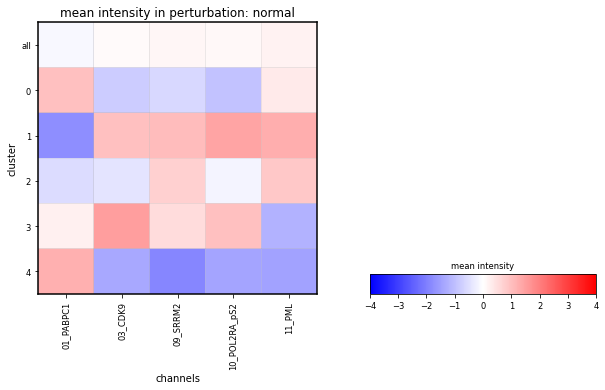

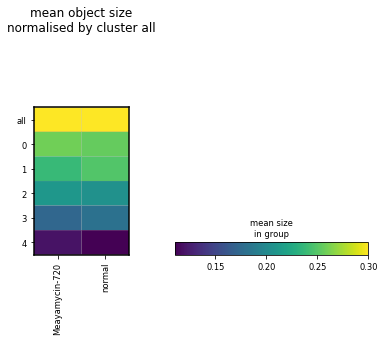

In [22]:
plot_mean_intensity(
    adata_intensity,
    groupby="cluster",
    limit_to_groups={"perturbation": "normal"},
    dendrogram=False,
    layer=None,
    standard_scale="var",
    cmap="bwr",
    vmin=-4,
    vmax=4,
)
plot_mean_size(
    adata_intensity,
    groupby_row="cluster",
    groupby_col="perturbation_duration",
    normby_row="all",
    vmax=0.3,
)

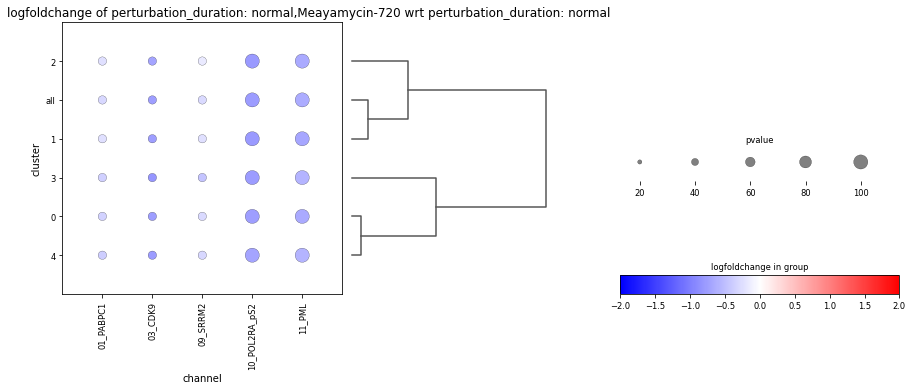

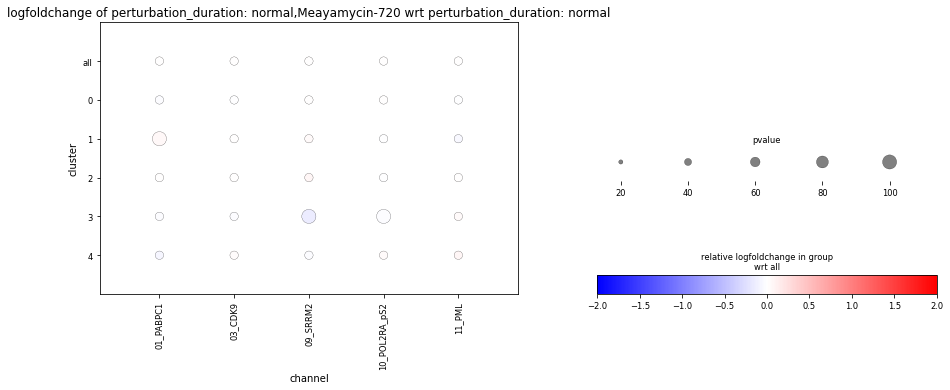

In [23]:
res = get_intensity_change(
    adata_intensity,
    groupby="cluster",
    reference_group="perturbation_duration",
    reference=["normal"],
    limit_to_groups={"perturbation_duration": ["normal", "Meayamycin-720"]},
    color="logfoldchange",
    size="pval",
)
plot_intensity_change(**res, adjust_height=True, figsize=(15, 5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(
    adata_intensity,
    groupby="cluster",
    reference_group="perturbation_duration",
    reference=["normal"],
    limit_to_groups={"perturbation_duration": ["normal", "Meayamycin-720"]},
    color="logfoldchange",
    size="pval",
    norm_by_group="all",
)
plot_intensity_change(**res, adjust_height=True, figsize=(15, 5), vmin=-2, vmax=2)

In [24]:
# get combined adata
adata_co_occ = ad.concat([extr.adata for extr in extrs], index_unique="-", uns_merge="same")


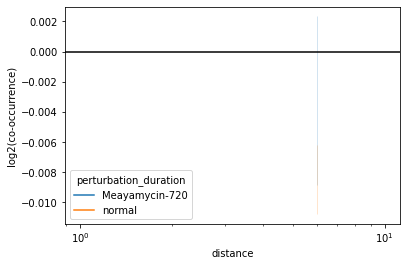

In [26]:
# plot meam co-occ scores
condition = "perturbation_duration"
condition_values = None

# for one cluster-cluster pairing
plot_co_occurrence(adata_co_occ, "0", "1", condition, condition_values)

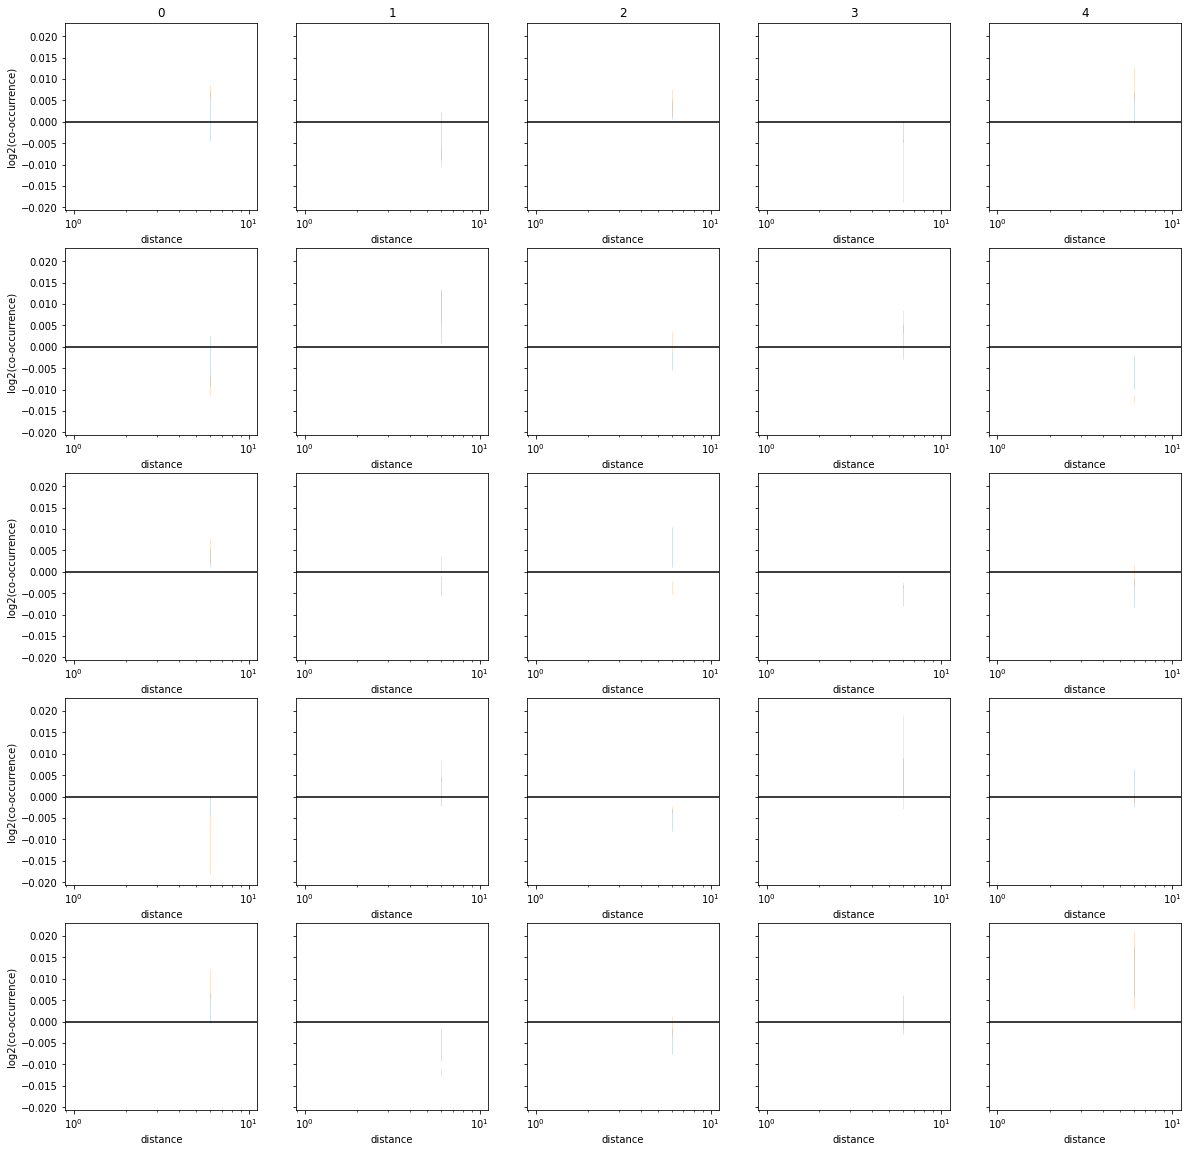

In [27]:
# for all cluster pairings
fig, axes = plot_co_occurrence_grid(adata_co_occ, condition, condition_values, legend=False, ci=95, figsize=(20, 20))

In [28]:
# aggregate object statistics using median
for extr in extrs:
    _ = extr.get_object_stats(area_threshold=10, agg=["median"])

# combined adatas for plotting
adata_object_stats = ad.concat([extr.adata for extr in extrs], index_unique="-", uns_merge="same")

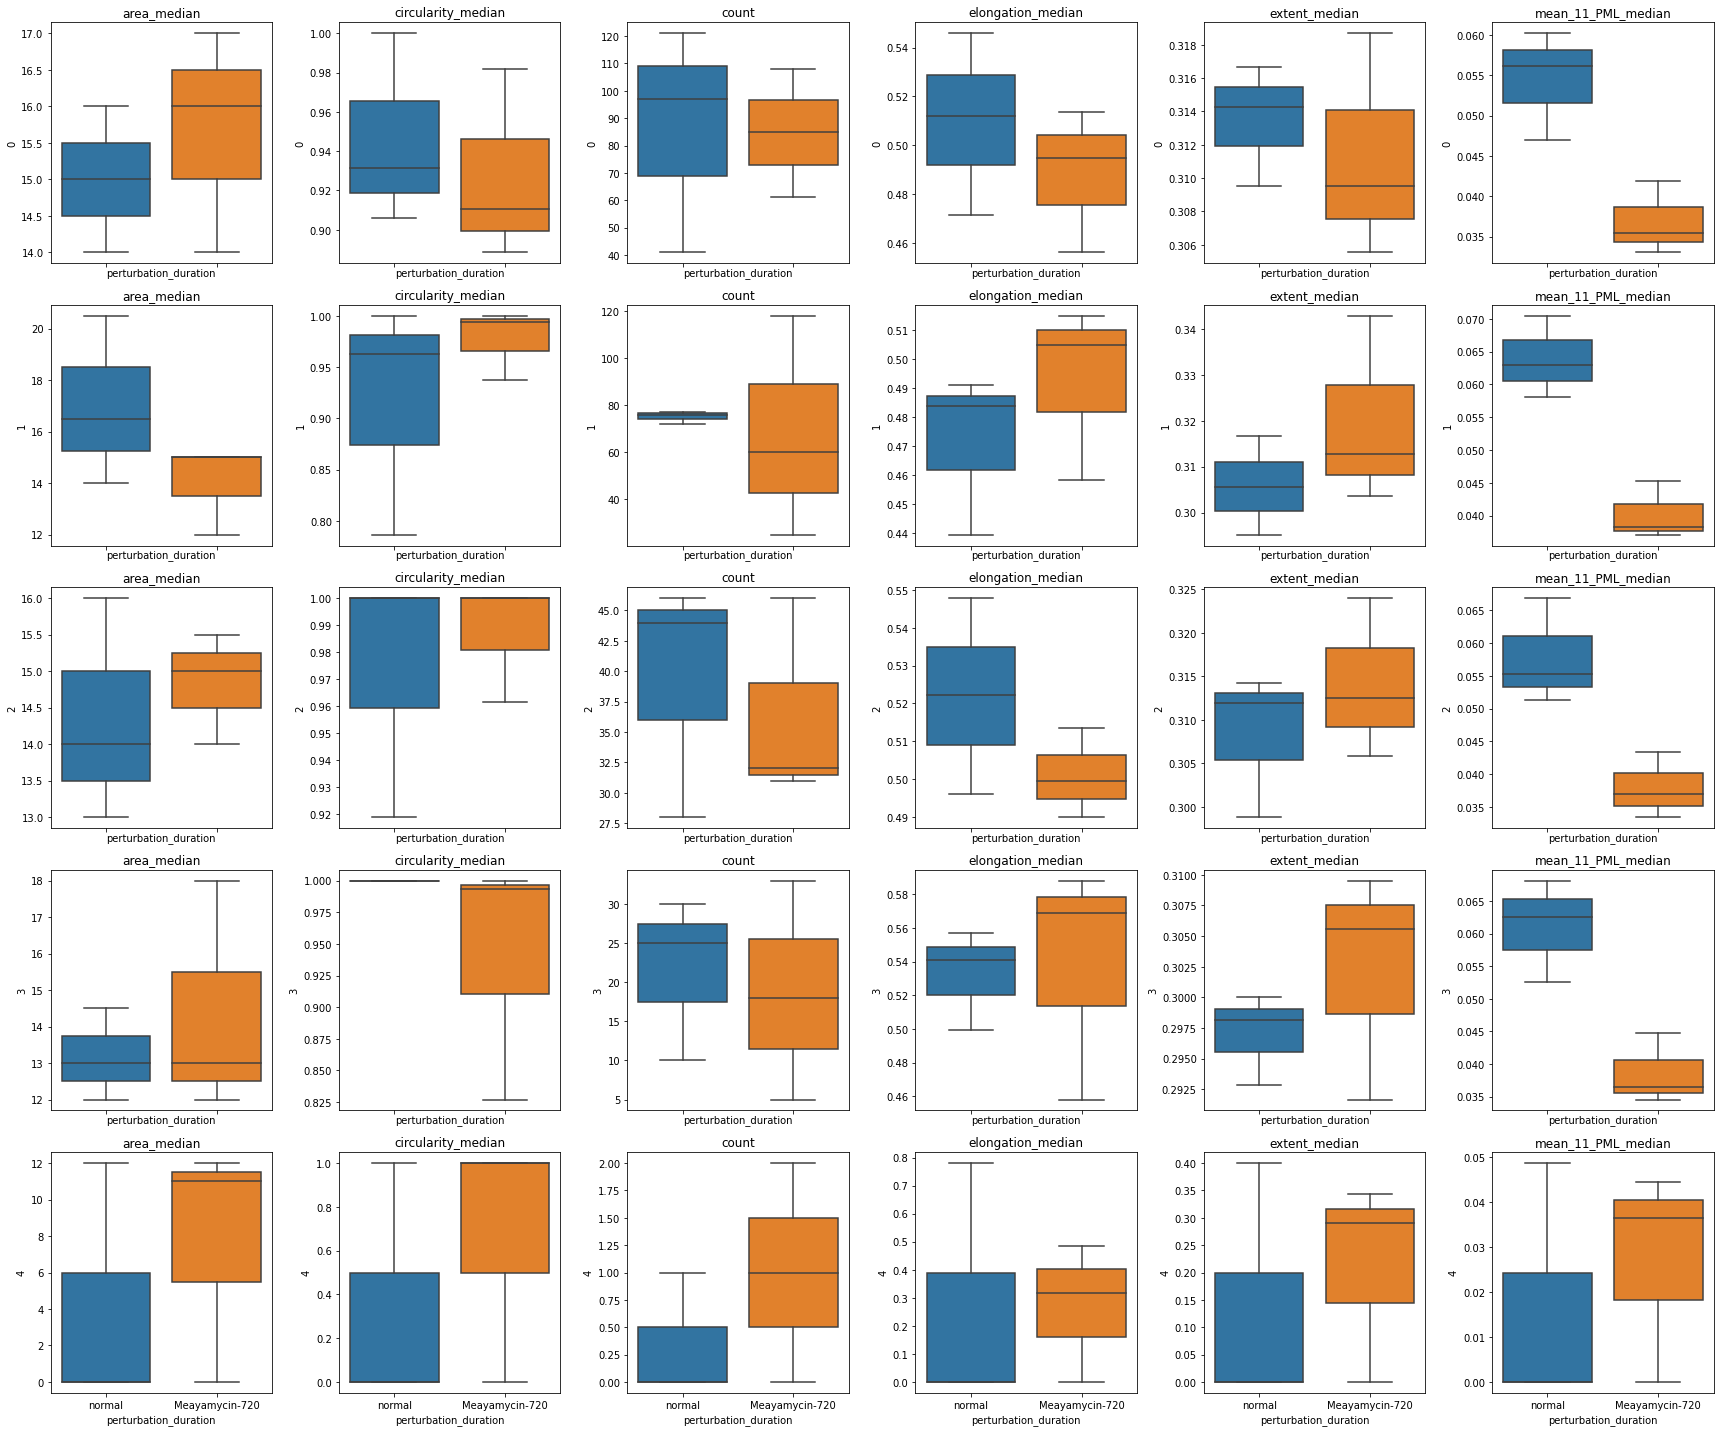

In [29]:
plot_object_stats(adata_object_stats, group_key="perturbation_duration", figsize_mult=(4, 4))

## Move test data - not needed, reference experiment is already in correct place

In [ ]:
# move data to tests folder
import shutil

to_dir = '/Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/_experiments/reference_experiment'
from_dir = '/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA/reference_experiment'
os.path.makedirs(to_dir, exist_ok=True)
shutil.move(from_dir, to_dir)

## Zip test data + experiment

In [38]:
import zipfile
import os

base = '/Users/hannah.spitzer/projects/pelkmans/software_new/campa/tests/'
#  create a ZipFile object
with zipfile.ZipFile(base+'_test_data.zip', 'w') as zip_obj:
    # Add multiple files to the zip
    # Iterate over all the files in directory
    for name in [base+'_experiments', base+'_data']:
        for foldername, subfolders, filenames in os.walk(name):
            #print(foldername)
            if foldername.endswith('__pycache__'):
                continue
            if 'test_experiment' in foldername:
                continue
            for filename in filenames:
                if filename == '.DS_Store':
                    continue
                #if filename == 'pynndescent_index.pickle':
                #    continue
                # create complete filepath of file in directory
                file_path = os.path.join(foldername, filename)
                # Add file to zip
                #print(file_path)
                zip_obj.write(file_path, file_path.replace(base, ''))

## Export all feature csv files to zip for figshare

In [2]:
import shutil
from campa.constants import campa_config
campa_config.config_fname = "../../campa/config.ini"
from campa.tl import Experiment
import os

outdir = os.path.join(campa_config.EXPERIMENT_DIR, "cell_features")

os.makedirs(outdir, exist_ok=True)

for exp_dir in ["VAE_all/CondVAE_pert-CC", "VAE_SBF2/CondVAE_siRNA-CC"]:
    exp = Experiment.from_dir(exp_dir)
    for data_dir in exp.data_params['data_dirs']:
        print(data_dir)
        cur_outdir = os.path.join(outdir, data_dir)
        os.makedirs(cur_outdir, exist_ok=True)
        csv_dir = os.path.join(exp.full_path, "aggregated/full_data", data_dir, "export")
        fnames = os.listdir(csv_dir)
        for fname in fnames:
            shutil.copyfile(os.path.join(csv_dir, fname), os.path.join(cur_outdir, fname))



Reading config from ../../campa/config.ini
184A1_unperturbed/I09
184A1_unperturbed/I11
184A1_unperturbed/J10
184A1_unperturbed/J12
184A1_DMSO/I14
184A1_DMSO/J16
184A1_AZD4573/I13
184A1_AZD4573/I17
184A1_AZD4573/J14
184A1_AZD4573/J18
184A1_AZD4573/J21
184A1_CX5461/I18
184A1_CX5461/J09
184A1_CX5461/J22
184A1_TSA/I16
184A1_TSA/J13
184A1_TSA/J20
184A1_triptolide/I10
184A1_triptolide/J15
184A1_meayamycin/I12
184A1_meayamycin/I20
HeLa_SBF2/K18
HeLa_SBF2/L19
HeLa_SBF2/M18
HeLa_scrambled/K19
HeLa_scrambled/L18
HeLa_scrambled/M19


In [3]:
# create zip
import zipfile
import os

base = campa_config.EXPERIMENT_DIR
#  create a ZipFile object
with zipfile.ZipFile(os.path.join(base,'cell_features.zip'), 'w') as zip_obj:
    # Add multiple files to the zip
    # Iterate over all the files in directory
    # Iterate over all the files in directory
    for foldername, subfolders, filenames in os.walk(outdir):
        if foldername.endswith('__pycache__'):
            continue
        for filename in filenames:
            if filename == '.DS_Store':
                continue
            #create complete filepath of file in directory
            file_path = os.path.join(foldername, filename)
            #print(file_path)
            # Add file to zip
            zip_obj.write(file_path, file_path.replace(base, ''))